In [1]:
import numpy as np
import torch as tr
import torch.nn as nn
from torch import distributions
from torch.nn.parameter import Parameter

import integrators as i
import update as u

import time
import matplotlib.pyplot as plt
from tqdm import tqdm

import argparse
import sys

import time



In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import os
os.environ["PATH"] = "/sciclone/home/yacahuanamedra/texlive/bin/x86_64-linux:" + os.environ["PATH"]

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{amsfonts}')
import pickle


from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}
mpl.rc('font', **font)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}
mpl.rc('font', **font)

## Dirac Visualization

torch.Size([10, 32, 32])


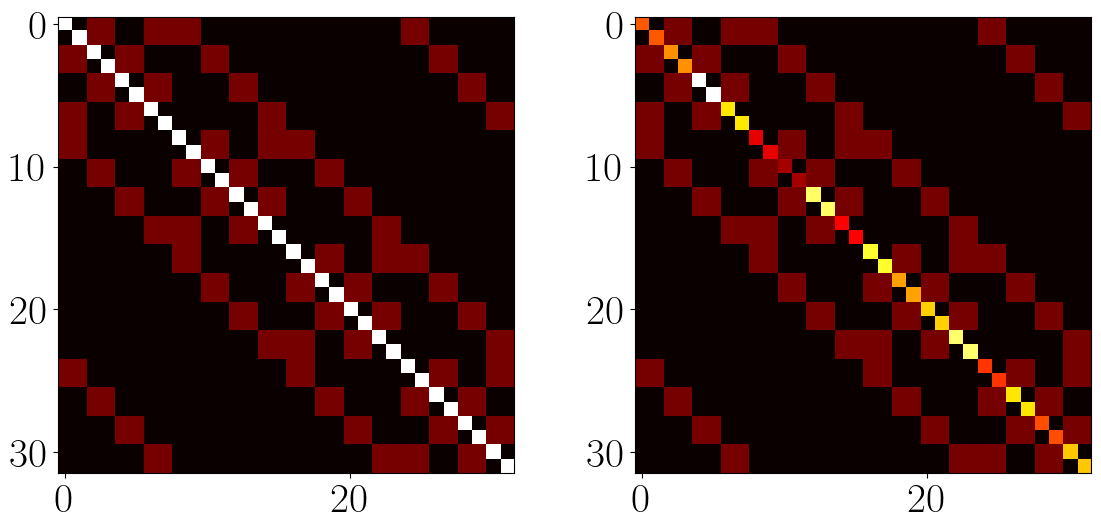

In [117]:
import njl as psi
L =4
model = psi.field(V=(L,L), l=0.2, m=0.1,Nf=2,batch_size=10)
sig=model.hotStart()
D_W = model.build_D_unscaled(sig)
sig1=model.coldStart()
D_W1 = model.build_D_unscaled(sig1)

# Verifica dimensiones
print(D_W.shape)  # torch.Size([32, 32]) para L=4
#print imshow
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[1].imshow(D_W[1].abs().numpy()[:120,:120], cmap='hot', interpolation='nearest')
ax[0].imshow(D_W1[1].abs().numpy()[:120,:120], cmap='hot', interpolation='nearest')




torch.Size([512]) torch.Size([512])


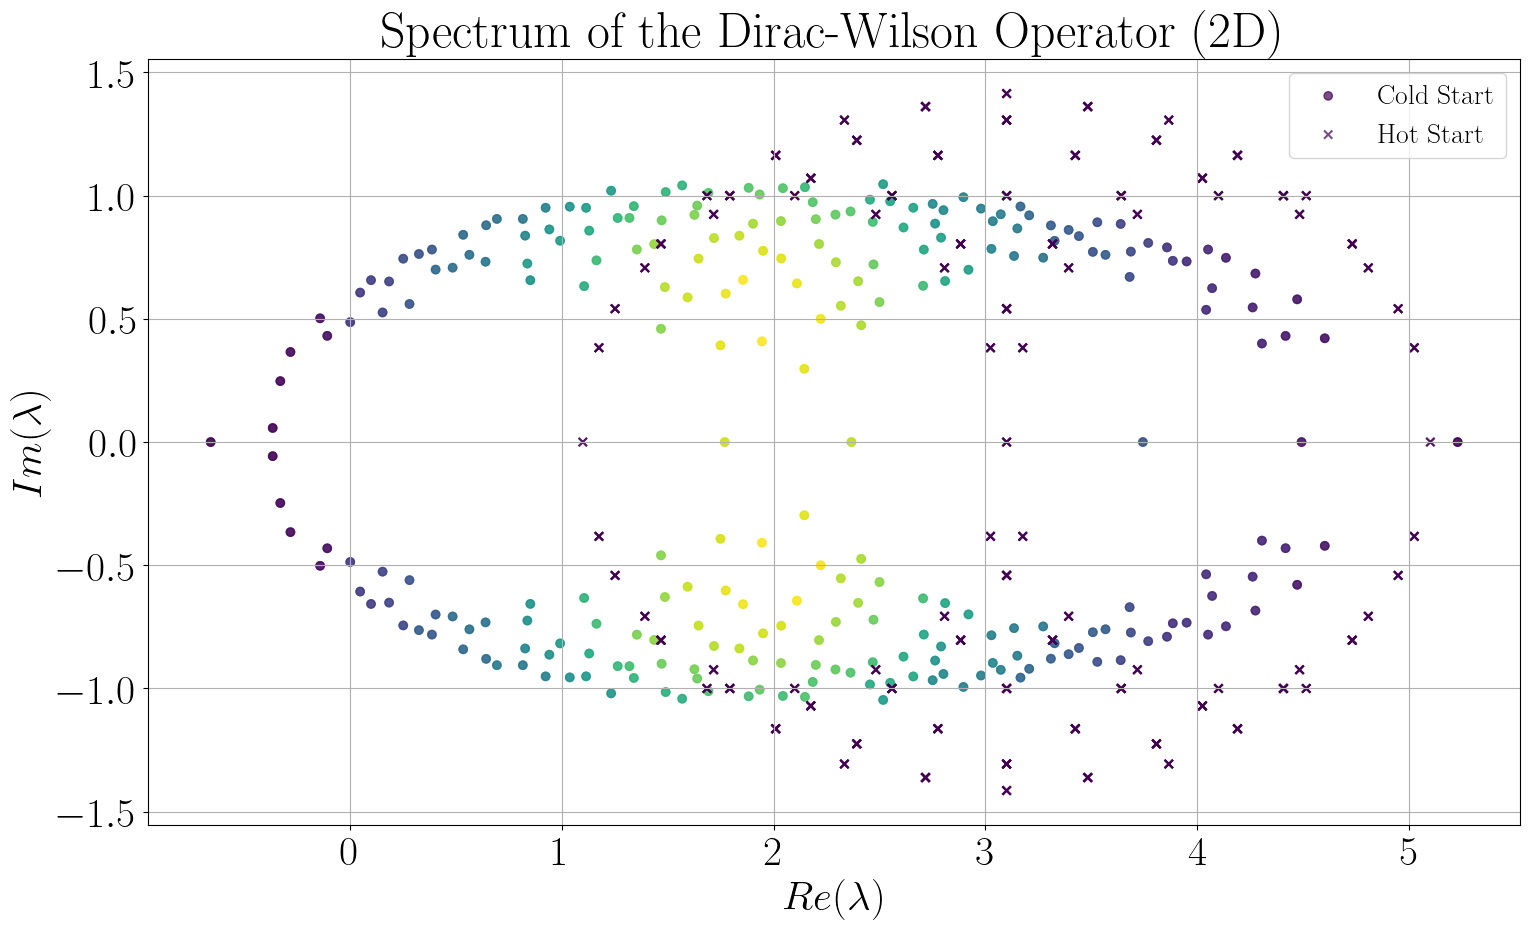

In [115]:
eigvals = tr.linalg.eigvals(D_W[0])
eigenvals1 = tr.linalg.eigvals(D_W1[0])
print(eigvals.real.shape, eigvals.imag.shape)
eigvals_np = eigvals.detach().cpu().numpy()
eigenvals1_np = eigenvals1 .detach().cpu().numpy()

plt.figure(figsize=(16, 10))
#points random colors
colors = plt.cm.viridis(np.linspace(0, 1, eigvals_np.shape[0]))
colors1= plt.cm.viridis(np.linspace(-1, 0, eigvals_np.shape[0]))
#random colors
#colors = np.random.rand(eigvals_np.shape[0], 3)
plt.scatter(eigvals_np.real, eigvals_np.imag,alpha=0.7, marker='o',color=colors,label='Cold Start')
plt.scatter(eigenvals1_np.real, eigenvals1_np.imag,alpha=0.7, marker='x',color=colors1,label='Hot Start')
plt.legend(fontsize=20)
plt.xlabel(r"$Re(\lambda)$")
plt.ylabel(r"$Im(\lambda)$")
eigen_number = D_W.shape[0]
plt.title(f"Spectrum of the Dirac-Wilson Operator (2D)")
#plt.xlim(0.4, 1.6)

plt.grid(True)
#plt.gca().set_aspect('equal')
plt.show()

# Epsilon test

In [ ]:
import njl as njl

import integrators as integ
L =16
m_njl = njl.field(V=(L,L), l=0.15, m=0.1,Nf=2,batch_size=1,dtype=tr.float64,device="cuda")


sig = m_njl.coldStart()
print(sig.shape)
current_phi=m_njl.generate_phi(sig)

P  = m_njl.refreshP()
K  = m_njl.kinetic(P)
V  = m_njl.action(sig)
Hi = K + V


print("The total initial energy is: ", Hi)
x=[]
y=[]
y2=[]
for rk in np.geomspace(10,200,20):
    k=int(rk)
    dt = 1.0/k
    print("Using dt= ",dt, "steps", k)
    l = integ.leapfrog(m_njl.force,m_njl.evolveQ,k,1.0)
    l2 = integ.minnorm2(m_njl.force,m_njl.evolveQ,k,1.0)
    PP,QQ = l.integrate(P,sig)
    PP2,QQ2 = l2.integrate(P,sig)
    Hf = m_njl.kinetic(PP)+ m_njl.action(QQ)
    Hf2 = m_njl.kinetic(PP2)+ m_njl.action(QQ2)
    #print("The total final energy is: ", Hf)
    DH = tr.abs(Hf - Hi).to("cpu")
    DH2 = tr.abs(Hf2 - Hi).to("cpu")
    x.append(dt) # esp^2 integrator
    y.append(DH)
    y2.append(DH2)
    print("Energy1",DH,"Energy2", DH2)

torch.Size([1, 16, 16])
The total initial energy is:  tensor([2342.0381], device='cuda:0', dtype=torch.float64)
Using dt=  0.1 steps 10
Energy1 tensor([1.2679e+09], dtype=torch.float64) Energy2 tensor([2286.5092], dtype=torch.float64)
Using dt=  0.09090909090909091 steps 11
Energy1 tensor([365.9656], dtype=torch.float64) Energy2 tensor([276197.7785], dtype=torch.float64)
Using dt=  0.07692307692307693 steps 13
Energy1 tensor([92.6770], dtype=torch.float64) Energy2 tensor([27735.6946], dtype=torch.float64)
Using dt=  0.0625 steps 16
Energy1 tensor([3285843.6605], dtype=torch.float64) Energy2 tensor([231.5856], dtype=torch.float64)
Using dt=  0.05555555555555555 steps 18
Energy1 tensor([292492.4802], dtype=torch.float64) Energy2 tensor([180.0296], dtype=torch.float64)
Using dt=  0.047619047619047616 steps 21
Energy1 tensor([1131.4574], dtype=torch.float64) Energy2 tensor([576.4553], dtype=torch.float64)
Using dt=  0.04 steps 25
Energy1 tensor([1054.2901], dtype=torch.float64) Energy2 ten

torch.Size([4, 8, 8])
The total initial energy is:  tensor([892.7416, 901.8745, 995.5898, 875.6802], device='cuda:0',
       dtype=torch.float64)
Using dt=  0.01 steps 100

Using dt=  0.009009009009009009 steps 111

Using dt=  0.008064516129032258 steps 124

Using dt=  0.007246376811594203 steps 138

Using dt=  0.006493506493506494 steps 154

Using dt=  0.005813953488372093 steps 172

Using dt=  0.005208333333333333 steps 192

Using dt=  0.004651162790697674 steps 215

Using dt=  0.004166666666666667 steps 240

Using dt=  0.003745318352059925 steps 267

Using dt=  0.003355704697986577 steps 298

Using dt=  0.003003003003003003 steps 333

Using dt=  0.0026954177897574125 steps 371

Using dt=  0.0024154589371980675 steps 414

Using dt=  0.0021645021645021645 steps 462

Using dt=  0.001937984496124031 steps 516

Using dt=  0.001736111111111111 steps 576

Using dt=  0.001557632398753894 steps 642

Using dt=  0.001394700139470014 steps 717

Using dt=  0.00125 steps 800



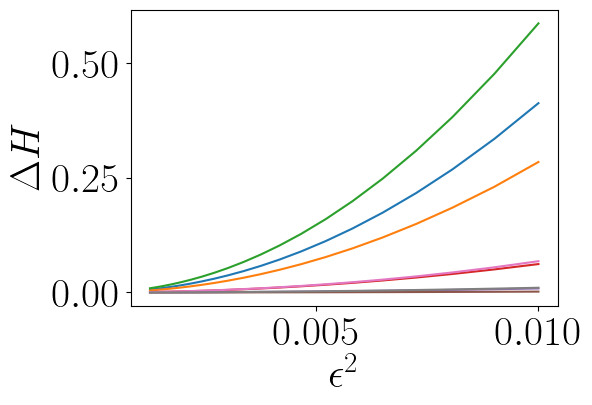

In [ ]:
# plotting the points  
plt.plot(x, y,x,y2) 
# naming the x axis 
plt.xlabel('$\\epsilon^2$') 
# naming the y axis 
plt.ylabel('$\\Delta H$') 
#plt.ylim(0,100)


# function to show the plot 
plt.show() 

(0.0, 0.015)

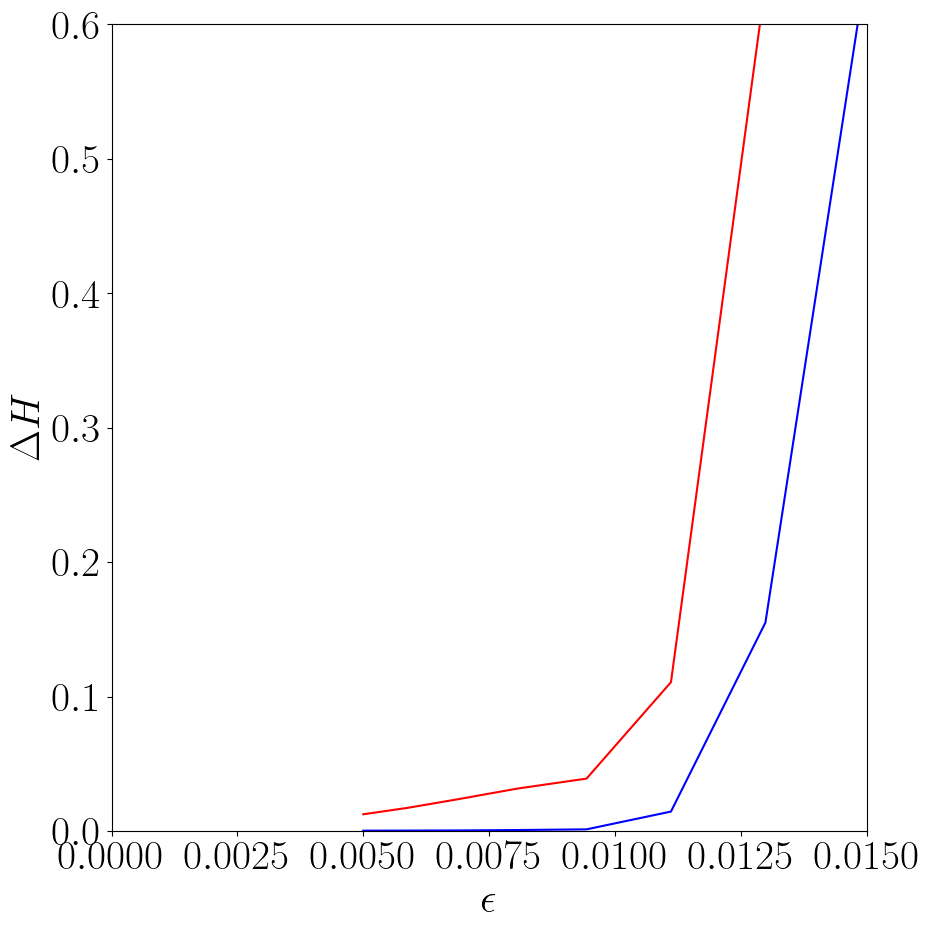

In [127]:
# plotting the points 
fig,ax = plt.subplots(figsize=(10,10))
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel(r"$\Delta H$") 
plt.plot(tr.tensor(x), tr.vstack(y),color="red")
plt.plot(tr.tensor(x), tr.vstack(y2),color="blue")
# naming the x axis 
plt.xlabel('$\\epsilon$') 
# naming the y axis 
plt.ylabel('$\\Delta H$') 
ax.set_ylim([0.00,0.6])
ax.set_xlim([0.00,0.015])
#limit y-axis


# Measurements 

Phase in the code $\delta_n=e^{\frac{2i\pi}{L}n}$ with $p_n=\frac{2\pi}{L}n$

\begin{align}
\text{Field average or magnetization:} \quad
\langle \phi \rangle &= \frac{1}{V} \sum_x \phi(x) \\[8pt]
\text{Magnetic susceptibility:} \quad
\chi_m &= V \cdot \langle \phi \rangle^2 \\[8pt]
%\text{Two-point correlator at momentum $p$}: \quad
%C_2(p) &= V \cdot \left| \frac{1}{V} \sum_x \phi(x) \, e^{i p_n x} \right|^2 \\[8pt]
\text{Energy density:} \quad
E &= \frac{S[\phi]}{V}
\end{align}



Correlation function

\begin{align}
C_2(p_n) &= V \cdot \left| \frac{1}{V} \sum_x \phi(x) \, e^{i p_n x} \right|^2 \\[8pt]
\end{align}


In [15]:
import Gamma_error as gm

import integrators as integ

import njl as njl

import time

L = 16
m_njl = njl.field(V=(L,L), l=0.4, m=0.0,Nf=2,batch_size=5,dtype=tr.float64,device="cuda")
Nwarm = 1
Nmeas = 300
Nskip = 1


sigma = m_njl.coldStart()
print(sigma.shape)
current_sigma=m_njl.generate_phi(sigma)

integr = integ.minnorm2(m_njl.force,m_njl.evolveQ,20,1.0)
samp = u.hmc(m_njl, integr, verbose=True)

sigma= samp.evolve(sigma,Nwarm)

tic=time.perf_counter()
Vol=m_njl.Vol
lat=[sigma.shape[1], sigma.shape[2]]
toc=time.perf_counter()

print(f"time {(toc - tic)*1.0e6/Nwarm:0.4f} micro-seconds per HMC trajecrory")

lC2p = []
lchi_m = []
E = []
av_sig = []
history_C_pi = []
history_C_sig=[]

phase=tr.tensor(np.exp(1j*np.indices(tuple(lat))[0]*2*np.pi/lat[0]),dtype=m_njl.dtype,device=m_njl.device)
for k in range(Nmeas):
    ttE = m_njl.action(sigma)/Vol
    E.append(ttE)
    av_sigma = tr.mean(sigma.view(m_njl.Bs,Vol),axis=1)
    av_sig.append(av_sigma)
    chi_m = av_sigma*av_sigma*Vol
    p1_av_sig = tr.mean(sigma.view(m_njl.Bs,Vol)*phase.view(1,Vol),axis=1)

    #c_pi, c_sig = m_njl.measure_correlators(sigma)
    #history_C_pi.append(c_pi)

    results = m_njl.measure_momentum_correlators(sigma, k_list=[0,1,2,3,4,5])
    history_C_pi.append(results['pion'])
    history_C_sig.append(results['sigma'])

    #C2p = tr.real(tr.conj(p1_av_sig)*p1_av_sig)*Vol
    if(k%100==0):
        print("k= ",k,"(av_sigma,chi_m, c2p, E) ", av_sigma.cpu().mean().numpy(),chi_m.cpu().mean().numpy(),ttE.cpu().mean().numpy())
        #print("len(C2p): ", len(C2p))
    #lC2p.append(C2p)
    lchi_m.append(chi_m)
    ## HMC update but also V cycle
    sigma = samp.evolve(sigma,Nskip)




torch.Size([5, 16, 16])
 HMC:  0  DH=  [-19.03574609660336, 12.661232256714129, 561.7756061739087, 100.76155076973214, 52.36299057164865]  A/R=  [True, False, False, False, False]  Pacc=  0.2
time 74.6700 micro-seconds per HMC trajecrory
k=  0 (av_sigma,chi_m, c2p, E)  0.8216003349669638 205.39721532247685 4.446562366195393
 HMC:  0  DH=  [2.56023171030472, 3696.5743868169843, -12.28274247104855, 83.88380945341282, 4428.482668122333]  A/R=  [False, False, True, False, False]  Pacc=  0.2
 HMC:  0  DH=  [0.3085361359792387, 560.2570568041131, 5.6914216888958435, -7.50183723120881, -0.7727170450657468]  A/R=  [True, False, False, True, True]  Pacc=  0.6000000000000001
 HMC:  0  DH=  [-0.03518131129567337, 480079.7273127474, 0.8471967370390985, 0.15185327892413625, 2.205704188288223]  A/R=  [True, False, True, True, False]  Pacc=  0.6000000000000001
 HMC:  0  DH=  [0.024368565614508952, 40.28904306176514, -0.0330296437891775, -0.00442430838859309, 0.1476099668510642]  A/R=  [True, False, T

In [167]:

print(f"time {(toc - tic)*1.0e6/Nwarm:0.4f} micro-seconds per HMC trajecrory")

lC2p = []
lchi_m = []
E = []
av_sig = []
history_C_pi = []
history_C_sig=[]

phase=tr.tensor(np.exp(1j*np.indices(tuple(lat))[0]*2*np.pi/lat[0]),dtype=m_njl.dtype,device=m_njl.device)
for k in range(Nmeas):
    ttE = m_njl.action(sigma)/Vol
    E.append(ttE)
    av_sigma = tr.mean(sigma.view(m_njl.Bs,Vol),axis=1)
    av_sig.append(av_sigma)
    chi_m = av_sigma*av_sigma*Vol
    p1_av_sig = tr.mean(sigma.view(m_njl.Bs,Vol)*phase.view(1,Vol),axis=1)

    #c_pi, c_sig = m_njl.measure_correlators(sigma)
    #history_C_pi.append(c_pi)

    results = m_njl.measure_momentum_correlators(sigma, k_list=[0,1,2,3,4,5])
    history_C_pi.append(results['pion'])
    history_C_sig.append(results['sigma'])

    #C2p = tr.real(tr.conj(p1_av_sig)*p1_av_sig)*Vol
    if(k%100==0):
        print("k= ",k,"(av_sigma,chi_m, c2p, E) ", av_sigma.cpu().mean().numpy(),chi_m.cpu().mean().numpy(),ttE.cpu().mean().numpy())
        #print("len(C2p): ", len(C2p))
    #lC2p.append(C2p)
    lchi_m.append(chi_m)
    ## HMC update but also V cycle
    sigma = samp.evolve(sigma,Nskip)




time 0.0484 micro-seconds per HMC trajecrory
k=  0 (av_sigma,chi_m, c2p, E)  0.34652092178634275 30.928073378761837 2.9045334565848937
 HMC:  0  DH=  [0.009419417846174838, 0.00021624589305702102, 0.116299518915298, 0.16753295594912743, 0.06178249002834946, 0.045154399965326775, 0.10719213651861992, 0.2667570474143304, 0.002264011282250067, -0.04860772185179485, -0.009835355967879877, -0.010551922074000686, -0.0021096547235401886, 0.026315123757171932, 0.05417549079686523, 0.009654631448142936, 0.011495078961274885, 0.0019495771194897316, 0.09623145231250874, 0.0070950058791368065, 0.02528572524363426, -0.014686449653481759, 0.11732039618982526, 0.045901035321321615, 0.013546419516387687, -0.009321855398411572, 0.1406907308519294, 0.008052142063206702, 0.017827898412065224, -0.03409908588866983, 0.05085504428927834, 0.2659098367482784, 0.039776732135806014, -0.039485284412876354, 0.04661805978378197, 0.004653056645452125, -0.055187602336559394, 0.03635860229667287, 0.043640134052793655

In [16]:
from collections import defaultdict
cpt = defaultdict(list)
cpt_sig=defaultdict(list)
for r in history_C_pi:
    for key, value in r.items():
        cpt[key].append(value)
for r in history_C_sig:
    for key, value in r.items():
        cpt_sig[key].append(value)
#tr.stack(cpt[5])

/local/scr/yacahuanamedra/TMPDIR/ipykernel_1058106/1456948583.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


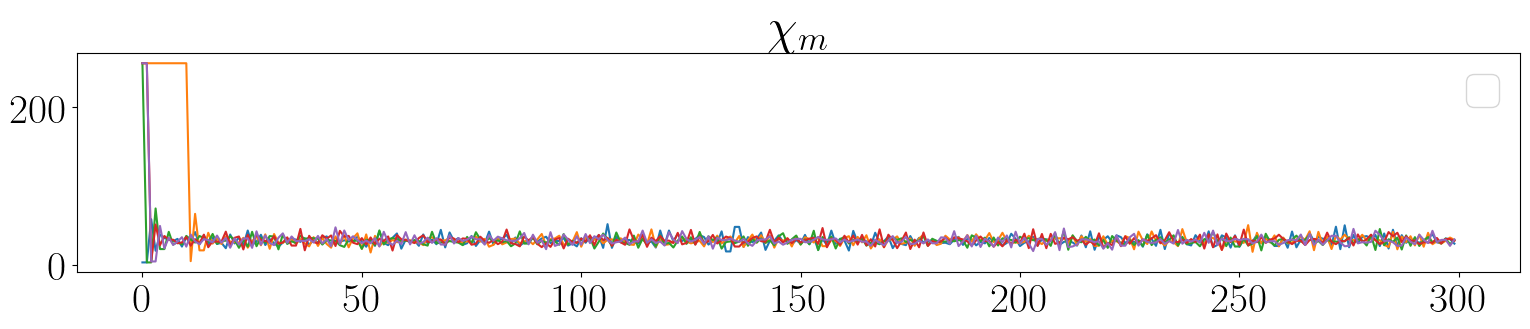

/local/scr/yacahuanamedra/TMPDIR/ipykernel_1058106/1456948583.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


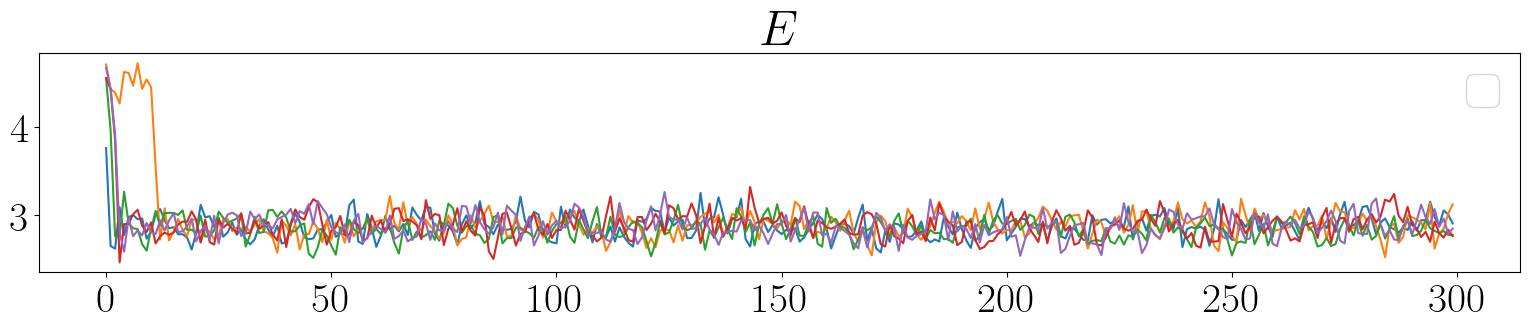

/local/scr/yacahuanamedra/TMPDIR/ipykernel_1058106/1456948583.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[time].legend(loc='upper left')


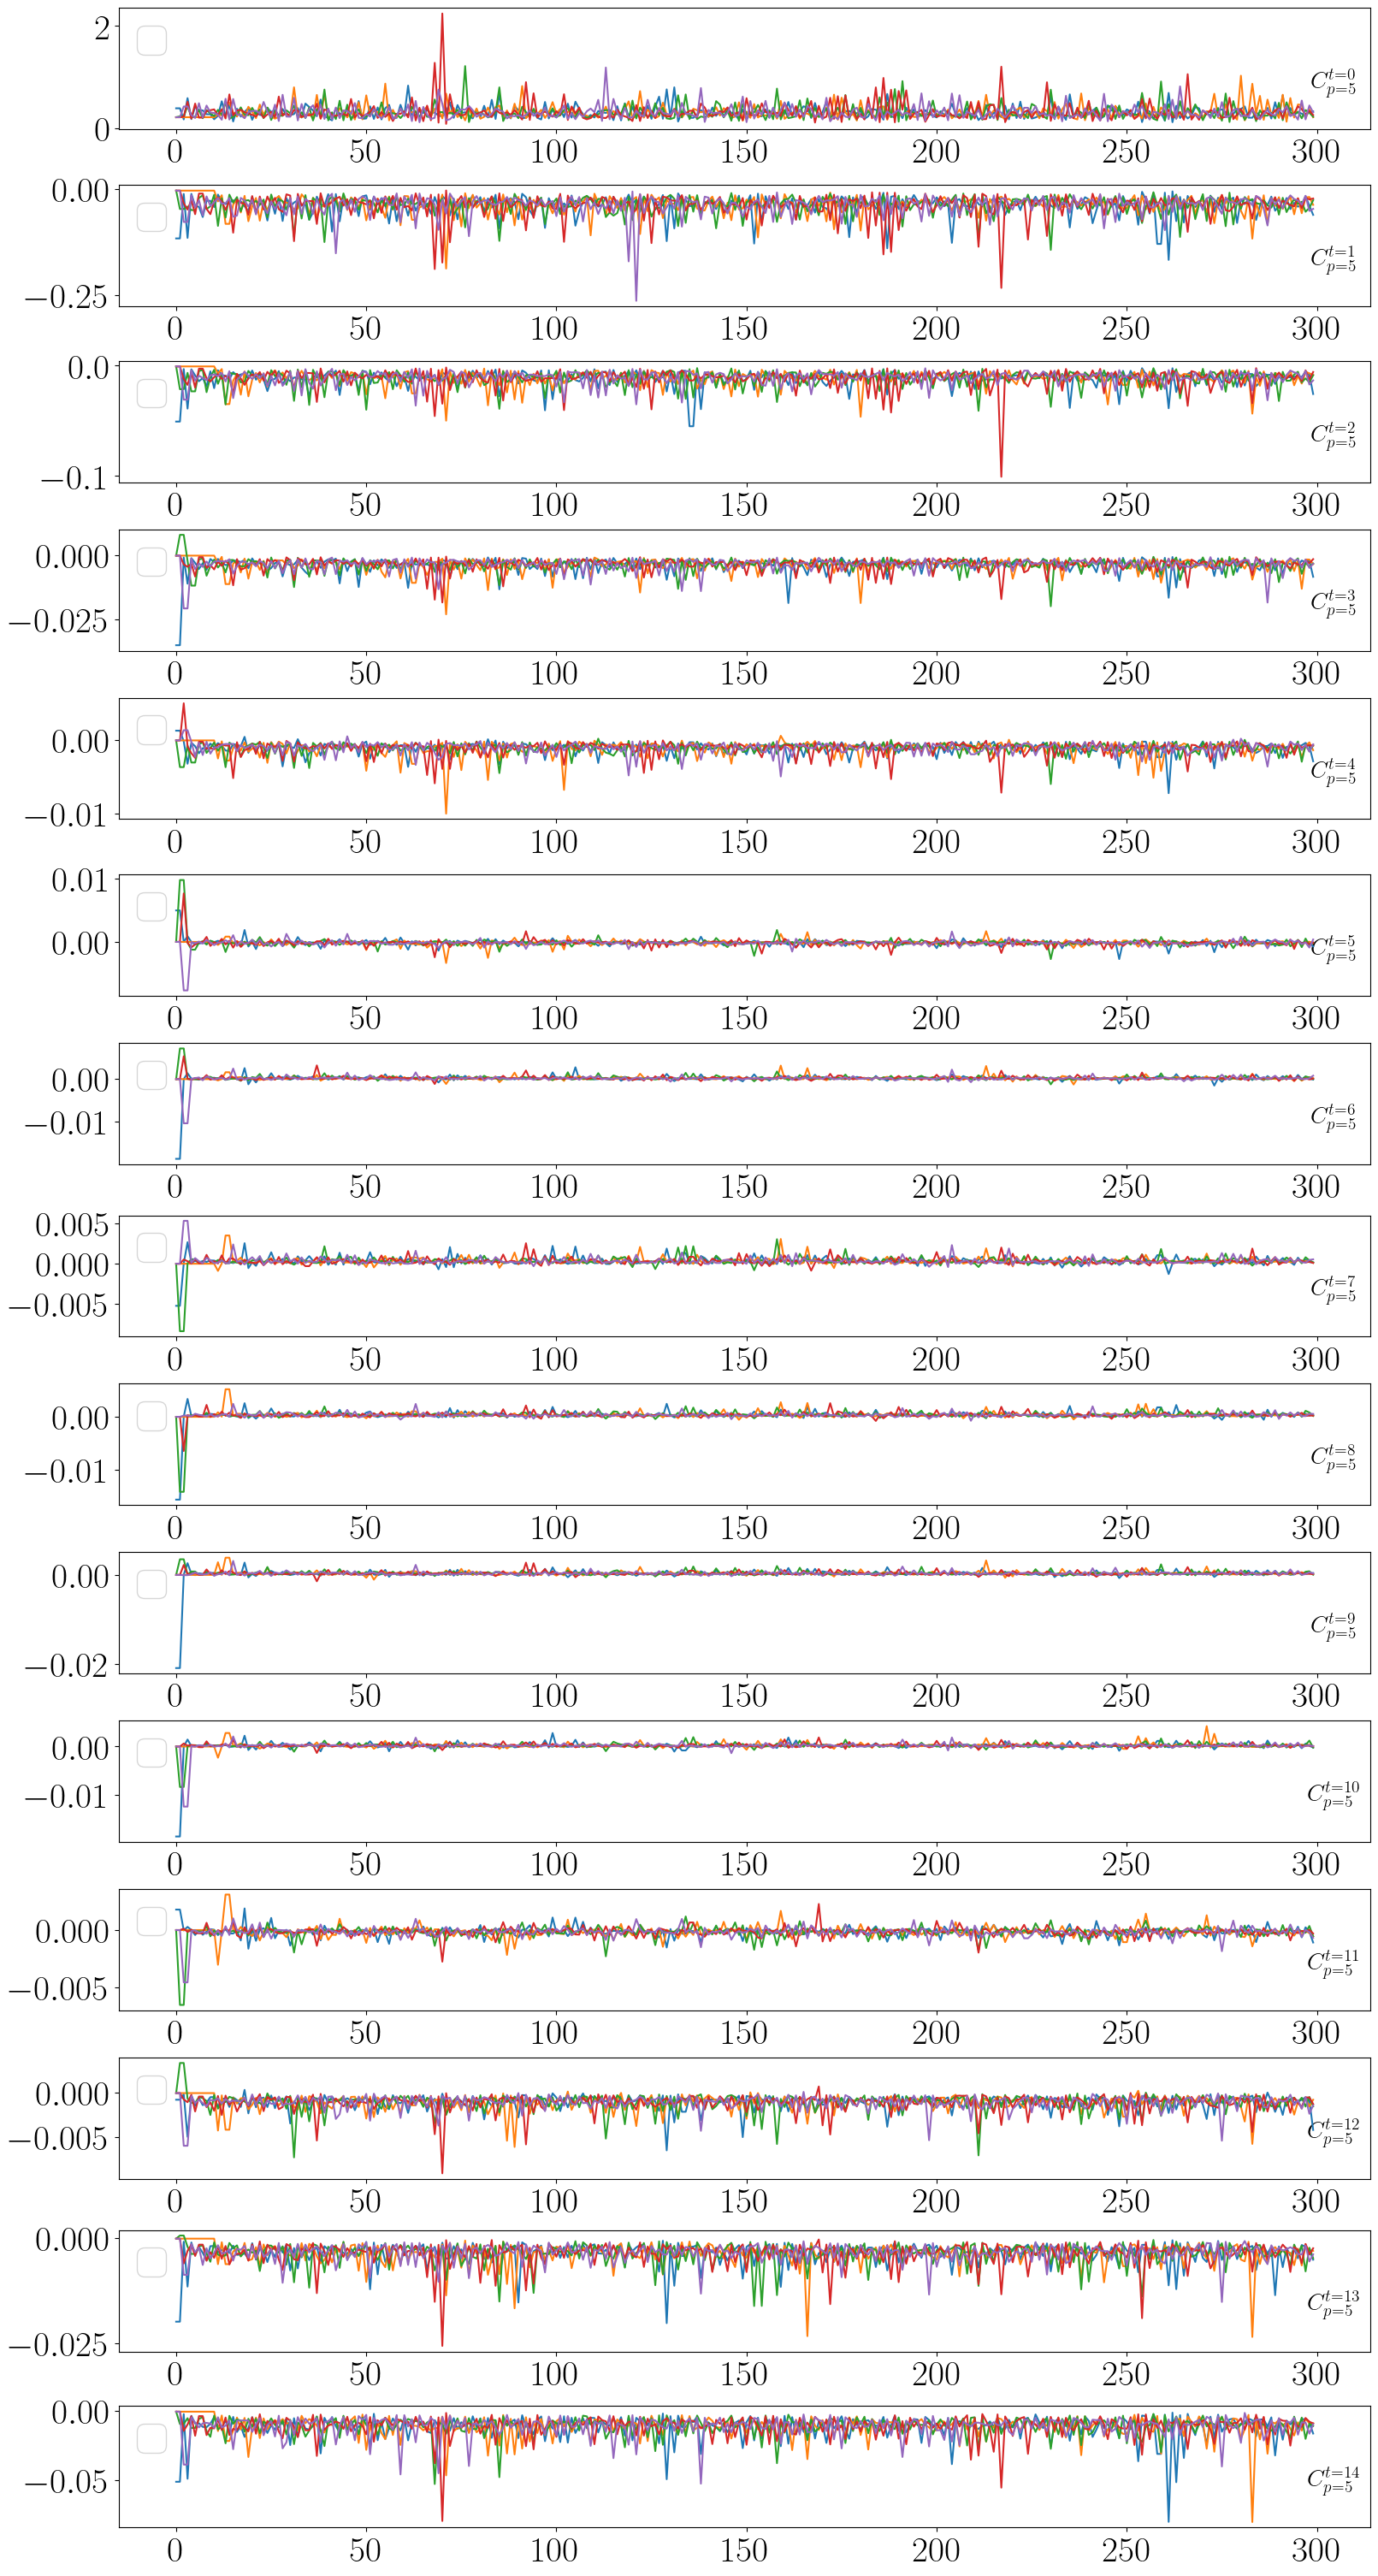

/local/scr/yacahuanamedra/TMPDIR/ipykernel_1058106/1456948583.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


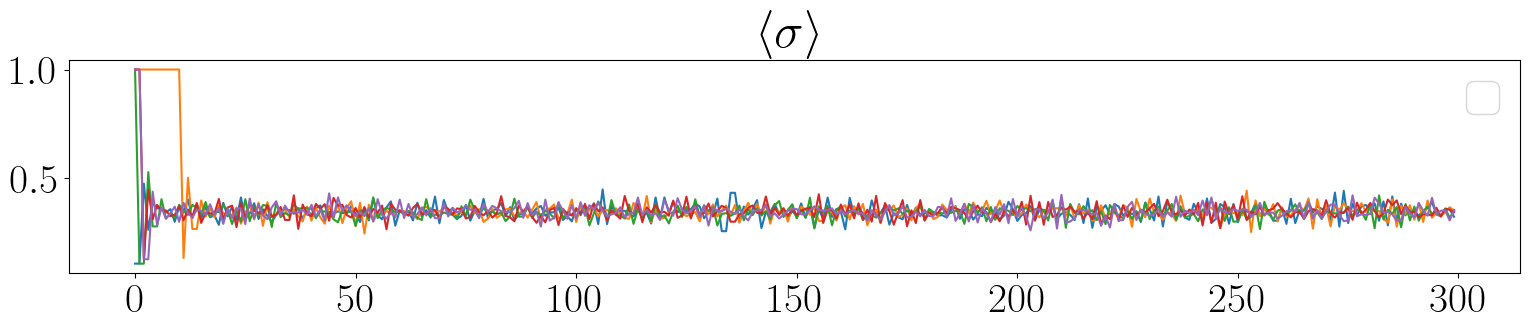

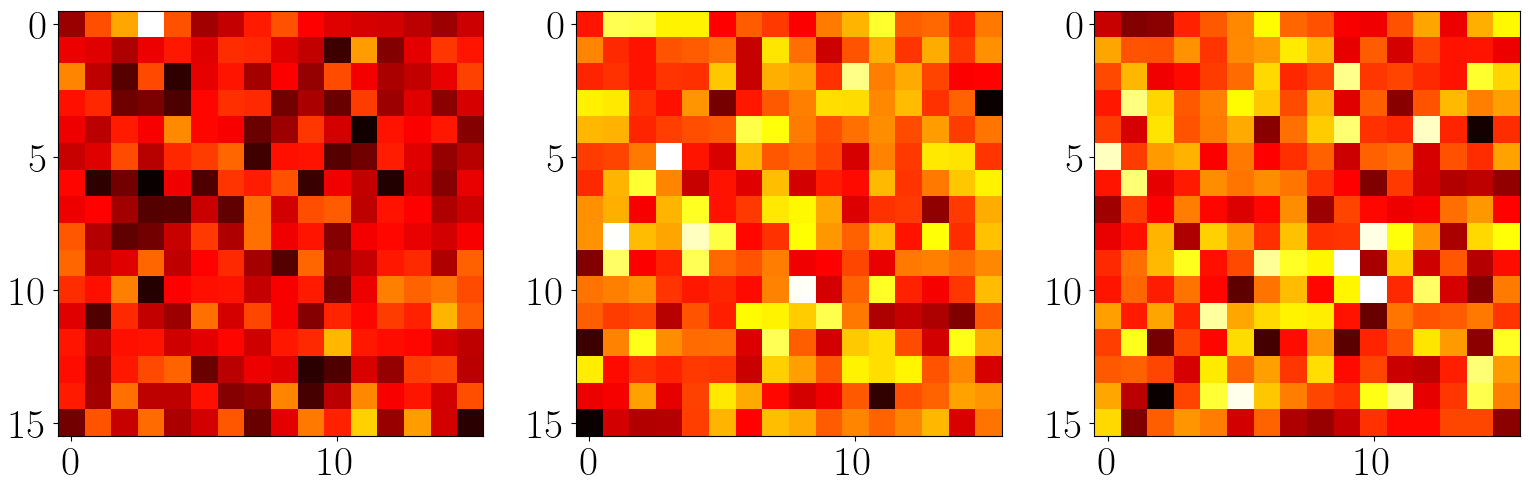

In [19]:
#size of the plot
#Nmeas =300
Nmeas1 = Nmeas
batch_size=5
plt.figure(figsize=(16, 4))
plt.title(r"$\chi_m$")
plt.plot(range(Nmeas),tr.vstack(lchi_m).reshape(Nmeas1,batch_size).to("cpu")[:Nmeas])#, label=r'$\chi_m$')
plt.legend()
plt.show()

plt.figure(figsize=(16, 4))
plt.title(r"$E$")
plt.plot(range(Nmeas),tr.vstack(E).reshape(Nmeas1,batch_size).to("cpu")[:Nmeas])#, label=r'$E$')
plt.legend()
plt.show()


fig, ax = plt.subplots(L-1, 1, figsize=(16, 30), constrained_layout=True)

for time in range(L-1):
    # Usamos set_ylabel pero lo movemos a la derecha
    ax[time].set_ylabel(rf"$C_{{p=5}}^{{t={time}}}$", rotation=0, labelpad=-30, fontsize=20)
    ax[time].yaxis.set_label_position("right")
    
    ax[time].plot(range(Nmeas), tr.vstack(cpt_sig[1])[:, time].reshape(Nmeas1, batch_size).to("cpu")[:Nmeas])
    ax[time].legend(loc='upper left')

plt.show()


plt.figure(figsize=(16, 4))
plt.title(r"$\langle \sigma \rangle$")
plt.plot(range(Nmeas),tr.vstack(av_sig).reshape(Nmeas1,batch_size).to("cpu")[:Nmeas])#, label=r'$\langle\phi\rangle$')
plt.legend()
plt.show()

fig, ax = plt.subplots(1,3, figsize=(16, 8))
for i in range(0,3):
    ax[i].imshow(sigma[i,:,:].to("cpu").detach().numpy(), cmap='hot', interpolation='nearest')

# Test

In [ ]:
import Gamma_error as gm

P_n=0
#time=0
all_E=[]
error_all_E=[]
for P_n in range(6):
    Es=[]
    errorEs=[]
    for time in range(0,7):
        A=[tr.stack(cpt[P_n])[:,:,time].to("cpu"),tr.stack(cpt[P_n])[:,:,time+1].to("cpu")]

        # Define observable: F = log(a1 / a2)
        E_eff  = lambda A: tr.log(A[0] / A[1])

        # run Γ-method analysis
        results = gm.gamma_method_with_replicas(A, E_eff)

        # print results
        print(f"F = {results['value']:.6f} ± {results['dvalue']:.6f} (±{results['ddvalue']:.6f})")
        print(f"tau_int = {results['tau_int']:.3f} ± {results['dtau_int']:.3f}")
        print(f"W_opt = {results['W_opt']}, Q = {results['Q']}")

        # plot figure 2
        #gm.plot_figure_2(results)
        Es.append(results['value'])
        errorEs.append(results['dvalue'])
    all_E.append(Es)
    error_all_E.append(errorEs)

Optimal window found: W = 1
F = 0.007210 ± 0.016287 (±0.000602)
tau_int = 0.133 ± 0.010
W_opt = 1, Q = 0.0
Optimal window found: W = 1
F = 0.020054 ± 0.019430 (±0.000704)
tau_int = 0.189 ± 0.014
W_opt = 1, Q = 2.421619571535416e-10
Optimal window found: W = 1
F = 0.037981 ± 0.022053 (±0.000782)
tau_int = 0.243 ± 0.017
W_opt = 1, Q = 0.0
Optimal window found: W = 1
F = 0.064568 ± 0.021728 (±0.000772)
tau_int = 0.236 ± 0.017
W_opt = 1, Q = 0.017795593932743214
Optimal window found: W = 1
F = 0.080023 ± 0.021846 (±0.000776)
tau_int = 0.239 ± 0.017
W_opt = 1, Q = 0.0
Optimal window found: W = 1
F = 0.099412 ± 0.022398 (±0.000792)
tau_int = 0.251 ± 0.018
W_opt = 1, Q = 2.0408200251953446e-07
Optimal window found: W = 1
F = 0.090823 ± 0.022714 (±0.000800)
tau_int = 0.258 ± 0.018
W_opt = 1, Q = 2.177369395894857e-12
Optimal window found: W = 1
F = 0.006601 ± 0.016216 (±0.000600)
tau_int = 0.132 ± 0.010
W_opt = 1, Q = 0.0
Optimal window found: W = 1
F = 0.017946 ± 0.018910 (±0.000687)
tau_int 

0
1
2
3
4


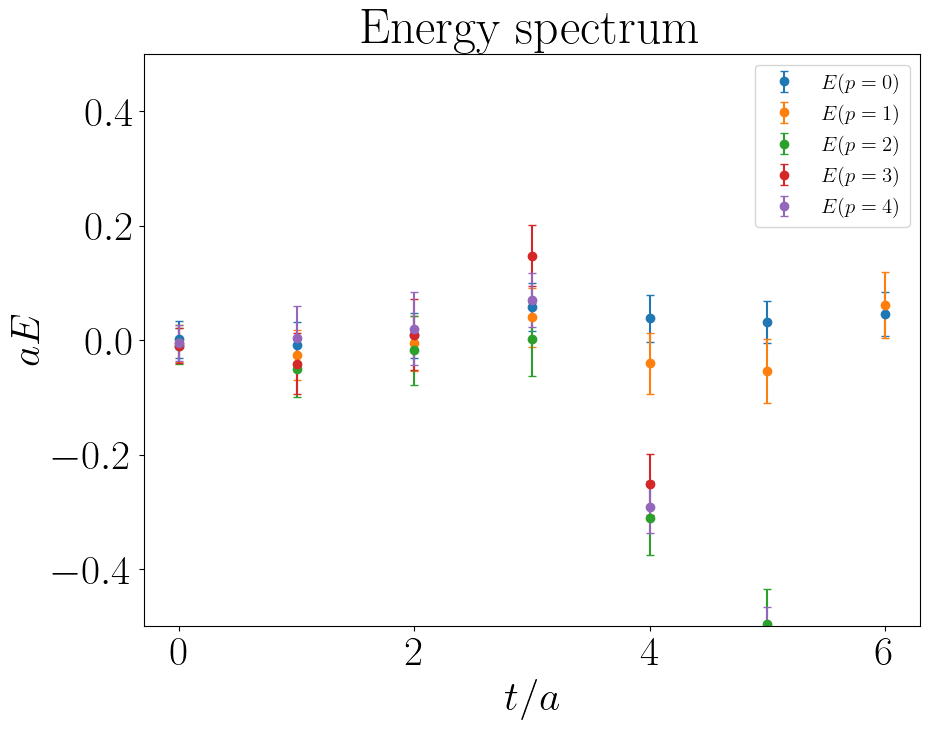

In [ ]:
#plot energies
plt.figure(figsize=(10,8))
for pp in range(5):
    print(pp)
    plt.errorbar(range(len(all_E[pp][:7])),all_E[pp][:7],yerr=error_all_E[pp][:7],fmt='o',capsize=3,label=rf"$E(p={pp})$")
#axes labels
plt.xlabel(r"$t/a$")
plt.ylabel(r"$aE$")
plt.title("Energy spectrum")
#limits
plt.ylim(-0.5,0.5)
plt.legend(fontsize=15)
plt.show()


In [ ]:


# Constantes de tu simulación
#L = 20
half_L = L // 2
#batch_size = 5 # Asegúrate de que coincida con tu sg.Bs
#Nmeas1 =600  # Tu número total de mediciones antes del reshape

all_E = []
error_all_E = []

for P_n in range(6):
    Es = []
    errorEs = []
    
    # ¡SOLO calculamos hasta la mitad de la red para el logaritmo!
    for time in range(half_L): 
        # Extraemos C(t) y C(t+1)
        C_t = tr.vstack(cpt[P_n])[:, time].reshape(-1, batch_size).to("cpu")
        C_tp1 = tr.vstack(cpt[P_n])[:, time+1].reshape(-1, batch_size).to("cpu")
        #print(C_t.shape,C_tp1.shape)

        # --- RE-ESTRUCTURACIÓN PARA EL MÉTODO GAMMA ---
        # Queremos una lista de 10 réplicas (una por batch)
        # Cada réplica debe tener shape [N_mediciones, 2_observables]
        replicas = []
        for b in range(batch_size):
            # Apilamos en dim=1 para tener [C(t), C(t+1)] por cada medición
            rep = tr.stack([C_t[:, b], C_tp1[:, b]], dim=1) 
            #print(rep.shape)
            replicas.append(rep)

        # Observable: F = log( C(t) / C(t+1) )
        E_eff = lambda A: tr.log(A[0] / A[1])

        # Análisis de error con Wolff
        try:
            results = gm.gamma_method_with_replicas_corregido(replicas, E_eff)
            Es.append(results['value'])
            errorEs.append(results['dvalue'])
            #print momentum and time
            print(f"P_n = {P_n}, time = {time}")
            # print results
            print(f"F = {results['value']:.6f} ± {results['dvalue']:.6f} (±{results['ddvalue']:.6f})")
            print(f"tau_int = {results['tau_int']:.3f} ± {results['dtau_int']:.3f}")
            print(f"W_opt = {results['W_opt']}, Q = {results['Q']}")
        except Exception as e:
            print(f"--- FALLO CRÍTICO EN P_n={P_n}, time={time} ---")
            print(traceback.format_exc()) # Esto te dirá la línea exacta del crasheo
            Es.append(np.nan)
            errorEs.append(np.nan)
            
    all_E.append(Es)
    error_all_E.append(errorEs)

Optimal window found: W = 1
P_n = 0, time = 0
F = 1.430223 ± 0.004839 (±0.000003)
tau_int = 0.500 ± 0.001
W_opt = 1, Q = 0.0
Optimal window found: W = 1
P_n = 0, time = 1
F = 0.688888 ± 0.003908 (±0.000007)
tau_int = 0.500 ± 0.002
W_opt = 1, Q = 0.0
Optimal window found: W = 1
P_n = 0, time = 2
F = 0.492197 ± 0.003961 (±0.000013)
tau_int = 0.500 ± 0.003
W_opt = 1, Q = 0.0
Optimal window found: W = 1
P_n = 0, time = 3
F = 0.398416 ± 0.003458 (±0.000013)
tau_int = 0.500 ± 0.004
W_opt = 1, Q = 0.0
Optimal window found: W = 1
P_n = 0, time = 4
F = 0.340368 ± 0.003369 (±0.000016)
tau_int = 0.500 ± 0.005
W_opt = 1, Q = 0.0
Optimal window found: W = 1
P_n = 0, time = 5
F = 0.297953 ± 0.003393 (±0.000023)
tau_int = 0.500 ± 0.007
W_opt = 1, Q = 0.0
Optimal window found: W = 1
P_n = 0, time = 6
F = 0.257459 ± 0.003374 (±0.000018)
tau_int = 0.500 ± 0.005
W_opt = 1, Q = 0.0
Optimal window found: W = 1
P_n = 0, time = 7
F = 0.221174 ± 0.003123 (±0.000023)
tau_int = 0.500 ± 0.008
W_opt = 1, Q = 0.0


In [20]:


# Constantes de tu simulación
#L = 20
half_L = L // 2
batch_size = 10 # Asegúrate de que coincida con tu sg.Bs
Nmeas1 =500  # Tu número total de mediciones antes del reshape

all_E = []
error_all_E = []

for P_n in range(6):
    Es = []
    errorEs = []
    
    # ¡SOLO calculamos hasta la mitad de la red para el logaritmo!
    for time in range(half_L): 
        # Extraemos C(t) y C(t+1)
        C_t = tr.vstack(cpt[P_n])[:, time].reshape(-1, batch_size).to("cpu")
        C_tp1 = tr.vstack(cpt[P_n])[:, time+1].reshape(-1, batch_size).to("cpu")
        #print(C_t.shape,C_tp1.shape)

        # --- RE-ESTRUCTURACIÓN PARA EL MÉTODO GAMMA ---
        # Queremos una lista de 10 réplicas (una por batch)
        # Cada réplica debe tener shape [N_mediciones, 2_observables]
        replicas = []
        for b in range(batch_size):
            # Apilamos en dim=1 para tener [C(t), C(t+1)] por cada medición
            rep = tr.stack([C_t[:, b], C_tp1[:, b]], dim=1) 
            #print(rep.shape)
            replicas.append(rep)

        # Observable: F = log( C(t) / C(t+1) )
        E_eff = lambda A: tr.log(A[0] / A[1])

        # Análisis de error con Wolff
        try:
            results = gm.gamma_method_with_replicas(replicas, E_eff)
            Es.append(results['value'])
            errorEs.append(results['dvalue'])
            #print momentum and time
            print(f"P_n = {P_n}, time = {time}")
            # print results
            print(f"F = {results['value']:.6f} ± {results['dvalue']:.6f} (±{results['ddvalue']:.6f})")
            print(f"tau_int = {results['tau_int']:.3f} ± {results['dtau_int']:.3f}")
            print(f"W_opt = {results['W_opt']}, Q = {results['Q']}")
        except Exception as e:
            print(f"--- FALLO CRÍTICO EN P_n={P_n}, time={time} ---")
            print(traceback.format_exc()) # Esto te dirá la línea exacta del crasheo
            Es.append(np.nan)
            errorEs.append(np.nan)
            
    all_E.append(Es)
    error_all_E.append(errorEs)

P_n = 0, time = 0
F = 1.630282 ± 0.011227 (±0.000615)
tau_int = 0.640 ± 0.065
W_opt = 4, Q = 0.0769322135181304
P_n = 0, time = 1
F = 0.844547 ± 0.011339 (±0.000621)
tau_int = 0.629 ± 0.064
W_opt = 4, Q = 0.6078251539052719
P_n = 0, time = 2
F = 0.669482 ± 0.012546 (±0.000687)
tau_int = 0.677 ± 0.068
W_opt = 4, Q = 0.276967105758805
P_n = 0, time = 3
F = 0.555323 ± 0.013848 (±0.000758)
tau_int = 0.610 ± 0.062
W_opt = 4, Q = 0.9851239657441416
P_n = 0, time = 4
F = 0.478724 ± 0.016003 (±0.000877)
tau_int = 0.553 ± 0.057
W_opt = 4, Q = 0.753560540097247
P_n = 0, time = 5
F = 0.363592 ± 0.026162 (±0.001264)
tau_int = 0.510 ± 0.046
W_opt = 3, Q = 0.8078646924159322
P_n = 0, time = 6
F = 0.260849 ± 0.016633 (±0.000803)
tau_int = 0.549 ± 0.049
W_opt = 3, Q = 0.7314139000851951
P_n = 0, time = 7
F = 0.107430 ± 0.011138 (±0.000610)
tau_int = 0.663 ± 0.067
W_opt = 4, Q = 0.4875913187158706
P_n = 1, time = 0
F = 1.778408 ± 0.011953 (±0.000655)
tau_int = 0.654 ± 0.066
W_opt = 4, Q = 0.14373688993

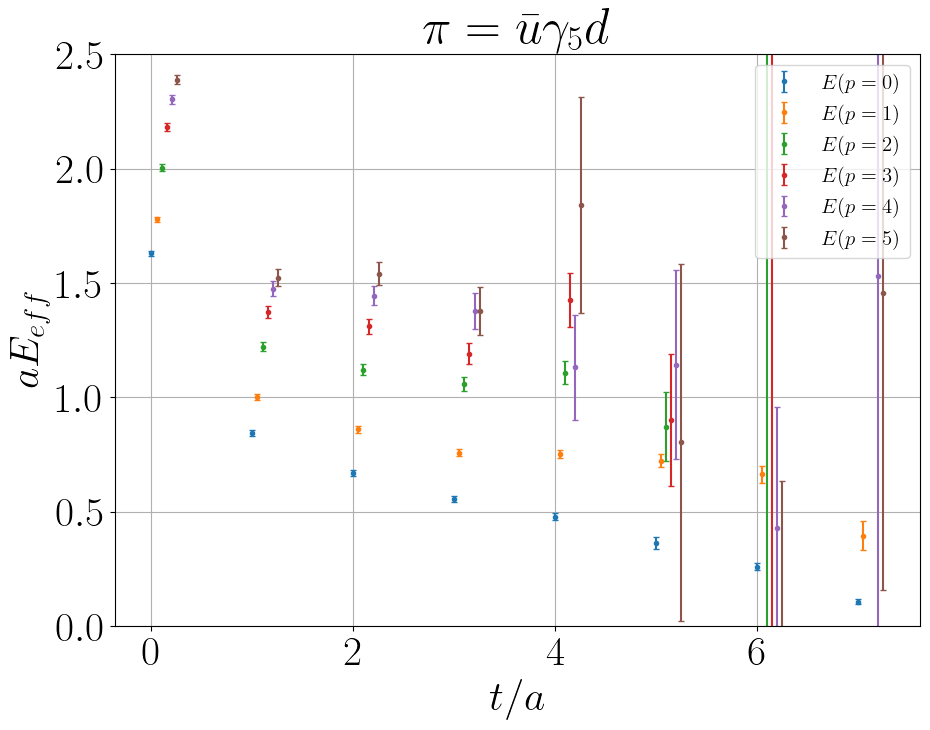

In [21]:
#plot energies
plt.figure(figsize=(10,8))

times=[i for i in range(len(all_E[0]))]
for pp in range(6):
    #print(pp)
    plt.errorbar([i+0.05*pp for i in times],all_E[pp],yerr=error_all_E[pp],fmt='.',capsize=2,label=rf"$E(p={pp})$")
#axes labels
plt.xlabel(r"$t/a$")
plt.ylabel(r"$aE_{eff}$")
plt.title(r"$\pi=\bar{u}\gamma_5 d$ ")
#limits
plt.ylim(-0,2.5)
# grid of the plot
plt.grid()
plt.legend(fontsize=15)
plt.show()

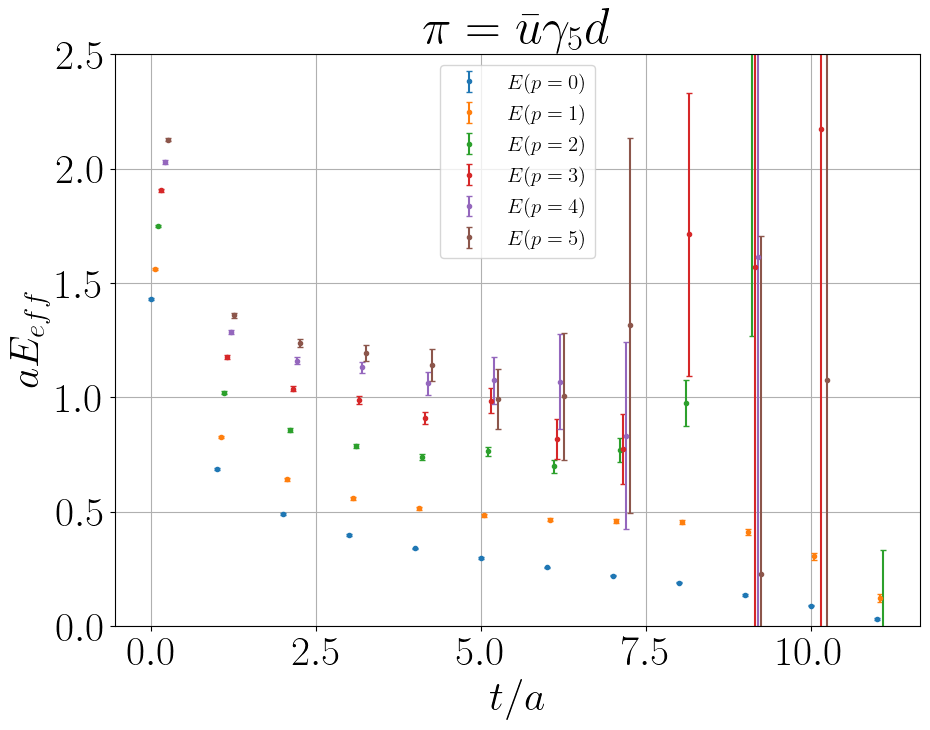

In [16]:
#plot energies
plt.figure(figsize=(10,8))

times=[i for i in range(len(all_E[0]))]
for pp in range(6):
    #print(pp)
    plt.errorbar([i+0.05*pp for i in times],all_E[pp],yerr=error_all_E[pp],fmt='.',capsize=2,label=rf"$E(p={pp})$")
#axes labels
plt.xlabel(r"$t/a$")
plt.ylabel(r"$aE_{eff}$")
plt.title(r"$\pi=\bar{u}\gamma_5 d$ ")
#limits
plt.ylim(-0,2.5)
# grid of the plot
plt.grid()
plt.legend(fontsize=15)
plt.show()

--- Fit con Estado Excitado para p=1 ---
Masa del Pión (E0) = 0.48151 ± 0.00294
Amplitud ruido (A) = 1.07259
Gap excitado (dE)  = 1.05344


<>:70: SyntaxWarning: invalid escape sequence '\D'
<>:70: SyntaxWarning: invalid escape sequence '\D'
/local/scr/yacahuanamedra/TMPDIR/ipykernel_939016/3430134829.py:70: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(t_suave, curva_fit, 'b-', linewidth=2, label=f'Fit: $E_0 + A e^{{-\Delta E t}}$')


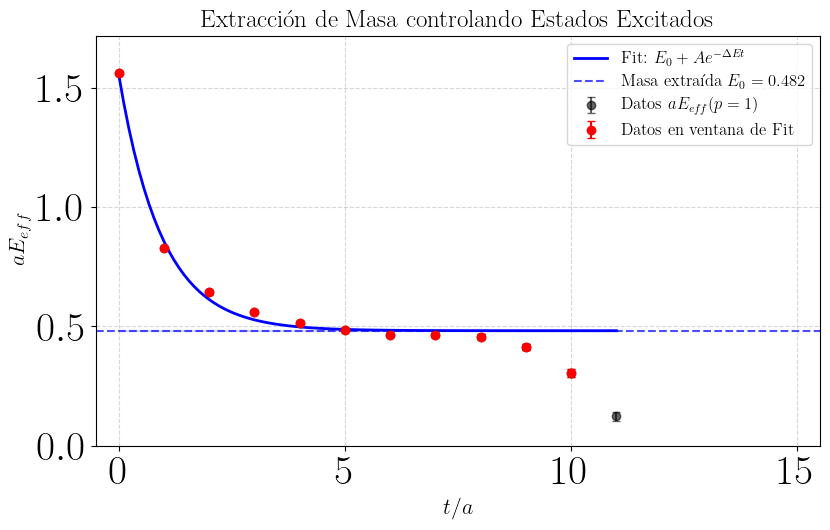

In [20]:
from scipy.optimize import curve_fit

# 1. Definir el modelo con un estado excitado
def modelo_estado_excitado(t, E0, A, delta_E):
    """
    E0: Masa del estado base (Pión real)
    A: Amplitud de la contaminación
    delta_E: Gap de energía (E1 - E0)
    """
    return E0 + A * np.exp(-delta_E * t)

# Elegimos el momento a analizar (ej. p=0)
P_n = 1

# Convertir listas a arrays
tiempos = np.arange(len(all_E[P_n]))
energias = np.array(all_E[P_n], dtype=float)
errores = np.array(error_all_E[P_n], dtype=float)

# 2. Definir la ventana de ajuste
# Ahora SÍ podemos incluir tiempos tempranos (ej. desde t=0 o t=1) 
# porque nuestro modelo ya tiene en cuenta esa caída exponencial.
# Ignoramos los t>=6 porque ahí dominan los NaNs o el ruido térmico.
t_min = 0
t_max = 10

mask = (tiempos >= t_min) & (tiempos <= t_max)
t_fit = tiempos[mask]
E_fit = energias[mask]
err_fit = errores[mask]

# 3. Realizar el Fit
# Necesitamos buenas estimaciones iniciales (p0) para que la exponencial no divague:
# p0 = [Masa esperada, Amplitud en t=0, Caída esperada]
estimacion_inicial = [0.5, E_fit[0] - 0.5, 1.0] 

# Usamos bounds para obligar a que delta_E y A sean positivos (físicamente correcto)
limites = ([0, 0, 0], [np.inf, np.inf, np.inf])

popt, pcov = curve_fit(
    modelo_estado_excitado, 
    t_fit, 
    E_fit, 
    p0=estimacion_inicial,
    bounds=limites,
    sigma=err_fit, 
    absolute_sigma=True,
    maxfev=10000
)

# Extraer parámetros y sus errores
E0_opt, A_opt, deltaE_opt = popt
error_E0 = np.sqrt(pcov[0, 0])

print(f"--- Fit con Estado Excitado para p={P_n} ---")
print(f"Masa del Pión (E0) = {E0_opt:.5f} ± {error_E0:.5f}")
print(f"Amplitud ruido (A) = {A_opt:.5f}")
print(f"Gap excitado (dE)  = {deltaE_opt:.5f}")

# 4. Graficar
plt.figure(figsize=(9, 6))

# Dibujar datos experimentales
plt.errorbar(tiempos, energias, yerr=errores, fmt='ko', capsize=3, label=f'Datos $aE_{{eff}}(p={P_n})$', alpha=0.6)
plt.errorbar(t_fit, E_fit, yerr=err_fit, fmt='ro', capsize=3, label='Datos en ventana de Fit')

# Dibujar la curva del fit (con alta resolución para que sea curva suave)
t_suave = np.linspace(t_min, t_max + 1, 100)
curva_fit = modelo_estado_excitado(t_suave, E0_opt, A_opt, deltaE_opt)
plt.plot(t_suave, curva_fit, 'b-', linewidth=2, label=f'Fit: $E_0 + A e^{{-\Delta E t}}$')

# Dibujar la línea asintótica de la masa real E0
plt.axhline(E0_opt, color='blue', linestyle='--', alpha=0.7, label=f'Masa extraída $E_0={E0_opt:.3f}$')
plt.fill_between(t_suave, E0_opt - error_E0, E0_opt + error_E0, color='blue', alpha=0.1)

plt.xlabel('$t/a$', fontsize=16)
plt.ylabel('$aE_{eff}$', fontsize=16)
plt.title('Extracción de Masa controlando Estados Excitados', fontsize=18)
plt.xlim(-0.5, 15.5)
plt.ylim(0, max(E_fit)*1.1)
plt.legend(fontsize=12)
plt.grid(True, ls='--', alpha=0.5)
plt.show()

<>:72: SyntaxWarning: invalid escape sequence '\D'
<>:75: SyntaxWarning: invalid escape sequence '\p'
<>:72: SyntaxWarning: invalid escape sequence '\D'
<>:75: SyntaxWarning: invalid escape sequence '\p'
/local/scr/yacahuanamedra/TMPDIR/ipykernel_939016/781002802.py:72: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(t_smooth, fit_curve, 'b-', lw=2, label=f'Fit: $E_0 + A e^{{-\Delta E t}}$')
/local/scr/yacahuanamedra/TMPDIR/ipykernel_939016/781002802.py:75: SyntaxWarning: invalid escape sequence '\p'
  plt.axhline(E0_mean, color='blue', linestyle='--', label=f'$E_0 = {E0_mean:.4f} \pm {E0_sd:.4f}$')


Running MCMC sampler...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [E0, A, dE]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.



--- Fit Results ---
      mean      sd  hdi_3%  hdi_97%
E0  1.1214  0.0166  1.0909   1.1529
A   0.9077  0.0180  0.8733   0.9414
dE  1.7033  0.1116  1.4920   1.9044


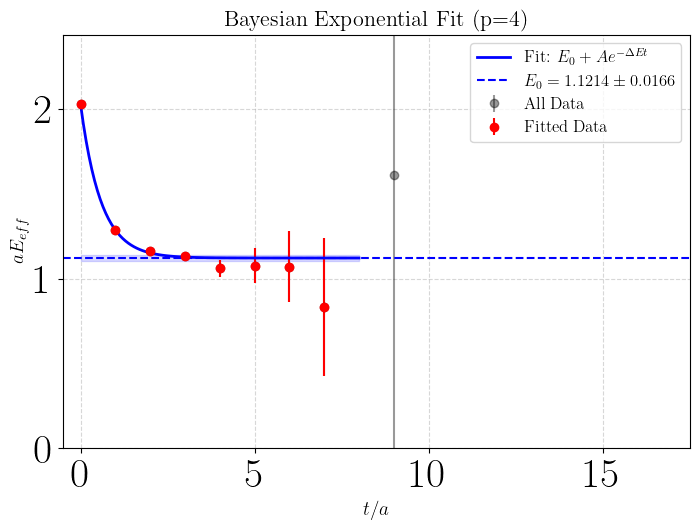

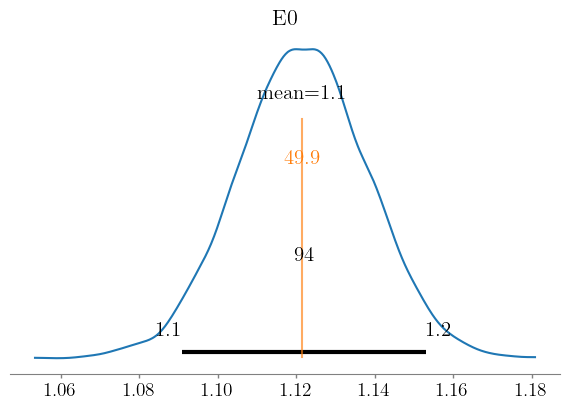

In [ ]:
import pymc as pm
import arviz as az

# ---------------------------------------------------------
# 1. Select Data and Fit Range
# ---------------------------------------------------------
P_n = 4  # Momentum to analyze (e.g., p=0)
t_min = 0  # Start time (can be 0 to capture the exponential drop)
t_max = 7  # End time (before noise explodes)

# Load data
t_data = np.arange(len(all_E[P_n]))
E_data = np.array(all_E[P_n], dtype=float)
E_err  = np.array(error_all_E[P_n], dtype=float)

# Filter data within the chosen t/a range
mask = (t_data >= t_min) & (t_data <= t_max)
t_fit = t_data[mask]
y_fit = E_data[mask]
err_fit = E_err[mask]

# ---------------------------------------------------------
# 2. PyMC Bayesian Model
# ---------------------------------------------------------
with pm.Model() as exponential_fit:
    
    # Priors: We force all physical parameters to be positive (lower=0)
    # E0: Ground state mass
    E0 = pm.TruncatedNormal('E0', mu=y_fit[-1], sigma=1.0, lower=0.0)
    
    # A: Amplitude of the excited state
    A = pm.TruncatedNormal('A', mu=y_fit[0]-y_fit[-1], sigma=2.0, lower=0.0)
    
    # dE: Energy gap to the excited state
    dE = pm.TruncatedNormal('dE', mu=1.0, sigma=2.0, lower=0.0)
    
    # Theoretical curve: E_eff(t) = E0 + A * exp(-dE * t)
    mu = E0 + A * pm.math.exp(-dE * t_fit)
    
    # Likelihood: Compare theory (mu) with data (y_fit) using Gamma errors
    likelihood = pm.Normal('likelihood', mu=mu, sigma=err_fit, observed=y_fit)
    
    # ---------------------------------------------------------
    # 3. Run the MCMC Sampler
    # ---------------------------------------------------------
    print("Running MCMC sampler...")
    trace = pm.sample(draws=2000, tune=1000, chains=4, target_accept=0.9, random_seed=42)

# ---------------------------------------------------------
# 4. Extract Results and Plot
# ---------------------------------------------------------
# Get the median values from the posterior distribution
summary = az.summary(trace, round_to=4)
print("\n--- Fit Results ---")
print(summary[['mean', 'sd', 'hdi_3%', 'hdi_97%']])

E0_mean = summary.loc['E0', 'mean']
E0_sd   = summary.loc['E0', 'sd']
A_mean  = summary.loc['A', 'mean']
dE_mean = summary.loc['dE', 'mean']

# Plotting
plt.figure(figsize=(8, 6))

# Original data
plt.errorbar(t_data, E_data, yerr=E_err, fmt='ko', alpha=0.4, label='All Data')
plt.errorbar(t_fit, y_fit, yerr=err_fit, fmt='ro', label='Fitted Data')

# Theoretical Fit Curve
t_smooth = np.linspace(t_min, t_max + 1, 100)
fit_curve = E0_mean + A_mean * np.exp(-dE_mean * t_smooth)
plt.plot(t_smooth, fit_curve, 'b-', lw=2, label=f'Fit: $E_0 + A e^{{-\Delta E t}}$')



<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
/local/scr/yacahuanamedra/TMPDIR/ipykernel_939016/2217097693.py:2: SyntaxWarning: invalid escape sequence '\p'
  plt.axhline(E0_mean, color='blue', linestyle='--', label=f'$E_0 = {E0_mean:.4f} \pm {E0_sd:.4f}$')


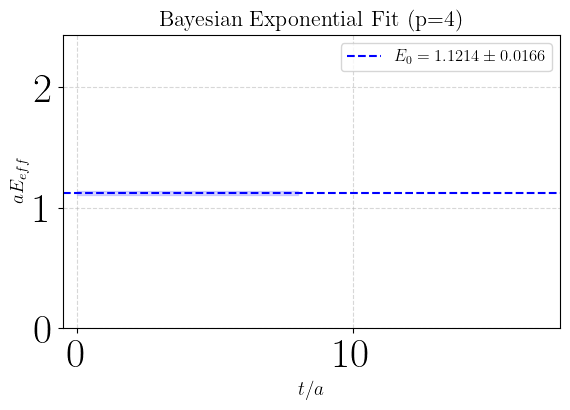

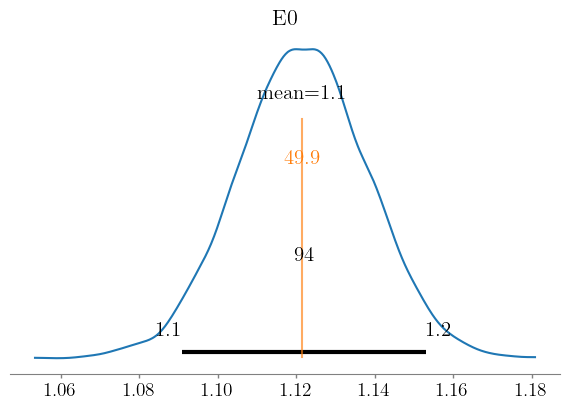

In [27]:
# Asymptotic Mass (E0) Line
plt.axhline(E0_mean, color='blue', linestyle='--', label=f'$E_0 = {E0_mean:.4f} \pm {E0_sd:.4f}$')
plt.fill_between(t_smooth, E0_mean - E0_sd, E0_mean + E0_sd, color='blue', alpha=0.15)

plt.xlabel('$t/a$', fontsize=14)
plt.ylabel('$aE_{eff}$', fontsize=14)
plt.title(f'Bayesian Exponential Fit (p={P_n})', fontsize=16)
plt.xlim(-0.5, 17.5)
plt.ylim(0, max(y_fit)*1.2)
plt.legend(fontsize=12)
plt.grid(True, ls='--', alpha=0.5)
plt.show()

# Optional: Plot the posterior distributions to see the error shape
az.plot_posterior(trace, var_names=['E0'], ref_val=E0_mean)
plt.show()